In [1]:
import pandas as pd  # Pandas for reading files
import numpy as np  # Numpy for math
import os
import seaborn as sns
import matplotlib.pyplot as plt  # Seaborn,Plotly and matplotlib for plotting and visualization

plt.style.use("default")  # Set the global style

In [2]:
import os

# Set Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = '' # Your username
os.environ['KAGGLE_KEY'] = '' # Your Key

In [3]:
!kaggle datasets download -d mohammadhossein77/brain-tumors-dataset

100% 221M/221M [00:02<00:00, 97.0MB/s]
100% 221M/221M [00:02<00:00, 93.3MB/s]


In [4]:
!unzip brain-tumors-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Data/Tumor/pituitary_tumor/P_217_HF_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_217_RO_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_217_SP_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_217_VF_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_218.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_218_BR_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_218_DA_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_218_HF_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_218_RO_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_218_SP_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_218_VF_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_219.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_219_BR_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_219_DA_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_219_HF_.jpg  
  inflating: Data/Tumor/pituitary_tumor/P_219_RO_.jpg  
  inflating: Data/Tumor/pituitary_

In [5]:
folder_path = "Data/Normal"
files = os.listdir(folder_path)
image_files = [f for f in files]

In [6]:
def show_img(i,ax):  # Function to show images in specific axis
    img = plt.imread(folder_path+f"/{image_files[i]}")
    ax.imshow(img)
    ax.axis(False)


def Show_NM_Images(n, m=None):  # Function to show n*m images
    if m is None :
      m = n
    fig, axs = plt.subplots(nrows=n, ncols=m, figsize=(20, 20))
    for i in range(n):
        for j in range(m):
            show_img(i*n+j+1,axs[i, j]) #type:ignore

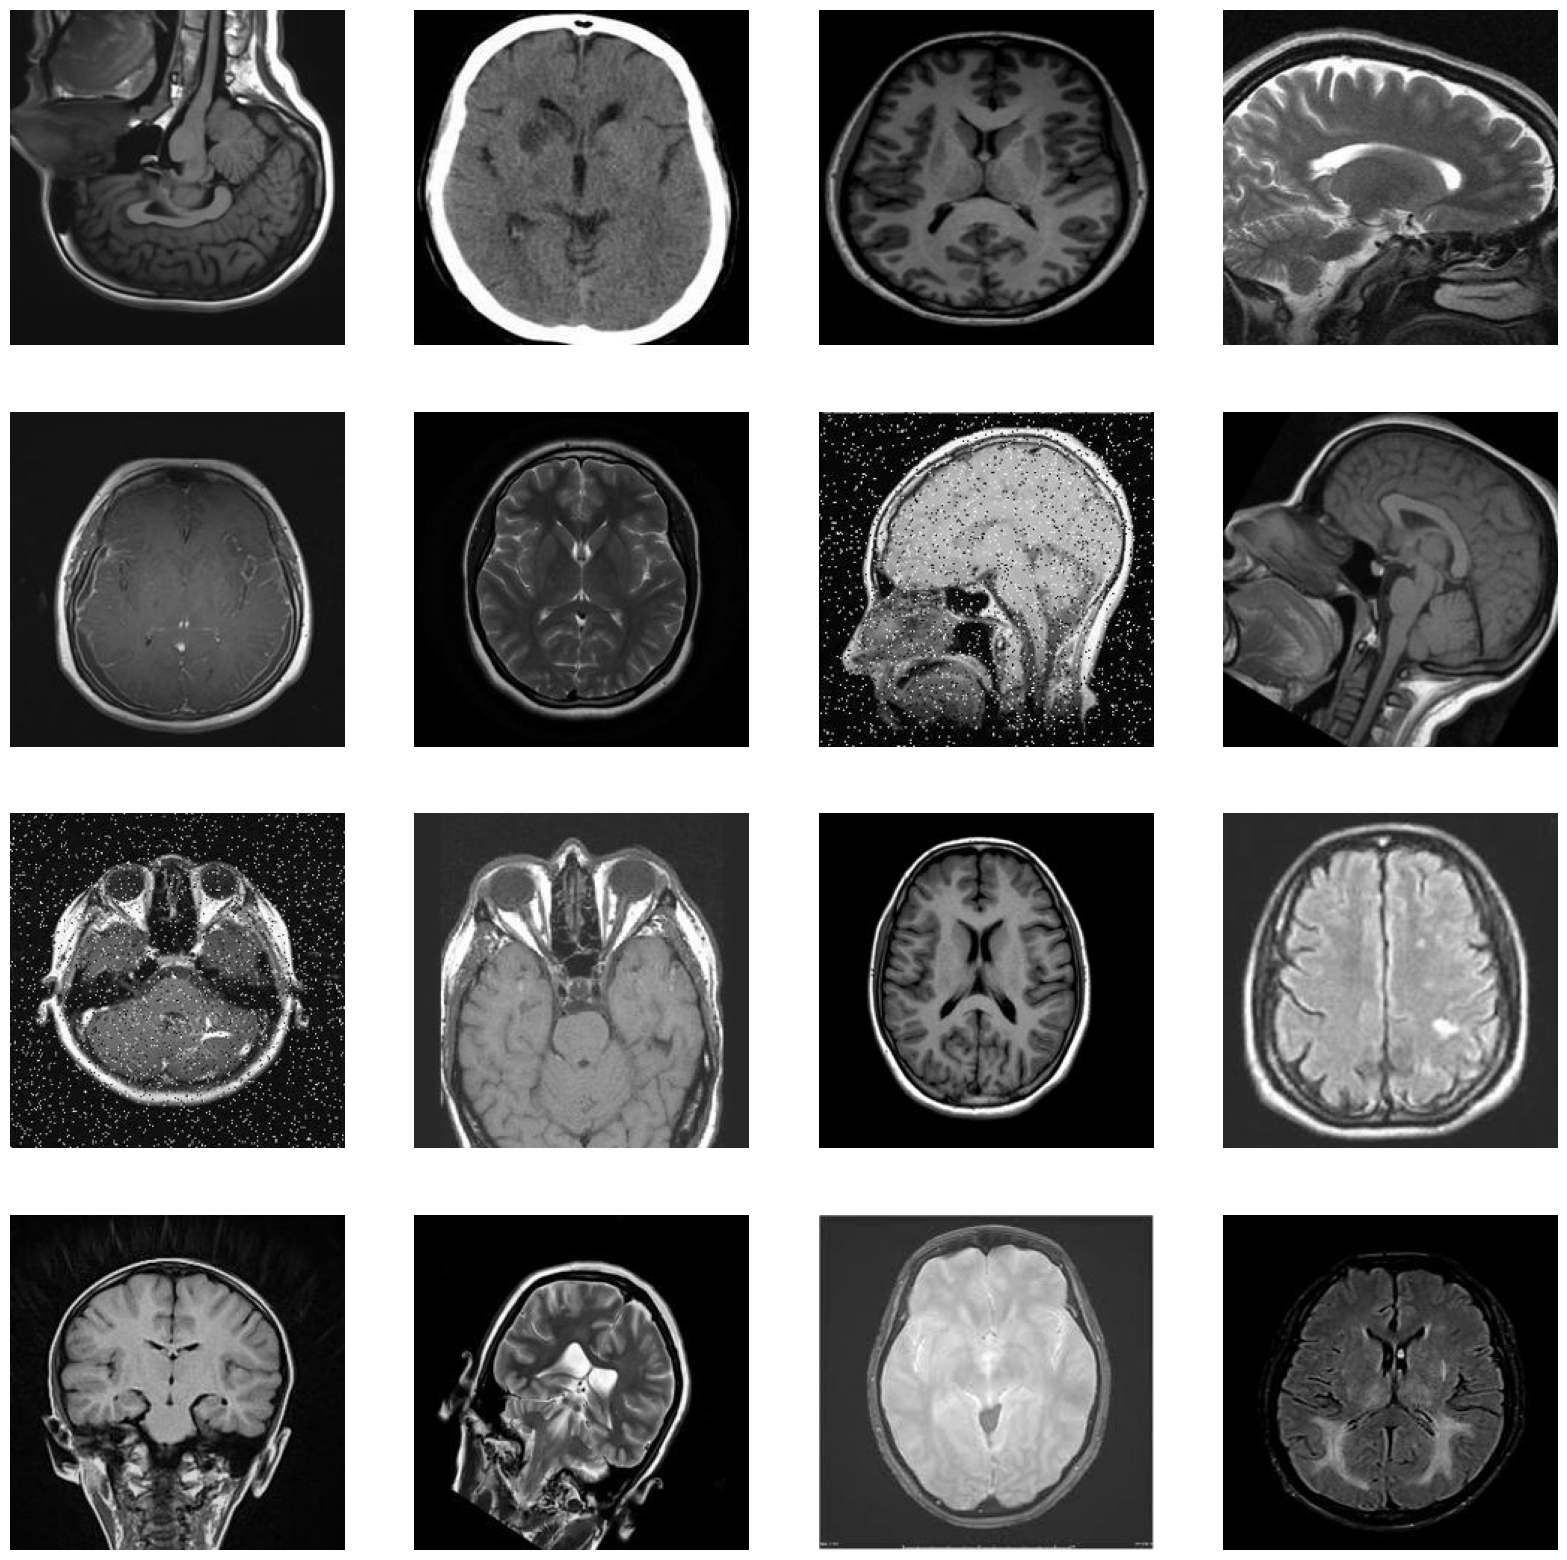

In [ ]:
Show_NM_Images(4)

In [7]:
def List_of_images(S):
  folder_path = f"Data/{S}"
  files = os.listdir(folder_path)
  return np.array([f"{folder_path}/{f}" for f in files])

Normal = List_of_images("Normal")
Pituitary = List_of_images("Tumor/pituitary_tumor")
Meningioma = List_of_images("Tumor/meningioma_tumor")
Glioma = List_of_images("Tumor/glioma_tumor")
labels = ['Normal', 'Pituitary', 'Meningioma', 'Glioma']
Case = [Normal, Pituitary, Meningioma, Glioma]

# Create a list of dictionaries containing image and label
data = [{"img": img, "label": labels[i]} for i in range(4) for img in Case[i]]

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)
df

,img,label
0,Data/Normal/N_97_DA_.jpg,Normal
1,Data/Normal/N_155_VF_.jpg,Normal
2,Data/Normal/N_197_BR_.jpg,Normal
3,Data/Normal/N_400_HF_.jpg,Normal
4,Data/Normal/N_430_SP_.jpg,Normal
...,...,...
21667,Data/Tumor/glioma_tumor/G_350.jpg,Glioma
21668,Data/Tumor/glioma_tumor/G_622_DA_.jpg,Glioma
21669,Data/Tumor/glioma_tumor/G_835_BR_.jpg,Glioma
21670,Data/Tumor/glioma_tumor/G_440_DA_.jpg,Glioma


In [8]:
from sklearn.model_selection import train_test_split


Train,Test = train_test_split(df, test_size=0.1, stratify=df['label'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
batch_size = 64
img_size = (224, 224)

_gen = ImageDataGenerator(rescale=1 / 255)


train_gen = _gen.flow_from_dataframe(
    Train,
    x_col="img",
    y_col="label",
    batch_size=batch_size,
    target_size=img_size,
)

test_gen = _gen.flow_from_dataframe(
    Test,
    x_col="img",
    y_col="label",
    batch_size=16,
    target_size=img_size,
    shuffle=False
)

Found 19504 validated image filenames belonging to 4 classes.
Found 2168 validated image filenames belonging to 4 classes.


In [15]:
train_gen.class_indices

{'Glioma': 0, 'Meningioma': 1, 'Normal': 2, 'Pituitary': 3}

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

# Image shape
img_shape = (224, 224, 3)

# Define Xception model
base_model = tf.keras.applications.Xception(
    include_top=False, weights="imagenet", input_shape=img_shape, pooling="max"
)

model = Sequential(
    [
        base_model,
        Flatten(),
        Dropout(rate=0.4),
        Dense(128, activation="relu"),
        Dropout(rate=0.25),
        Dense(4, activation="softmax"),
    ]
)

model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                         

In [ ]:
model.compile(
    optimizer=Adamax(learning_rate=0.005),
    loss="categorical_crossentropy",
    metrics=["accuracy", Precision(), Recall()],
)

# Train the model
hist = model.fit(
    train_gen,
    epochs=7
)

print("Xception Model Training History:")
print(hist.history)

Epoch 1/7
305/305 [==============================] - 357s 1s/step - loss: 0.9141 - accuracy: 0.6360 - precision: 0.8165 - recall: 0.3887
Epoch 2/7
305/305 [==============================] - 307s 1s/step - loss: 0.2710 - accuracy: 0.9152 - precision: 0.9313 - recall: 0.8952
Epoch 3/7
305/305 [==============================] - 305s 1s/step - loss: 0.1023 - accuracy: 0.9685 - precision: 0.9723 - recall: 0.9645
Epoch 4/7
305/305 [==============================] - 306s 1s/step - loss: 0.0759 - accuracy: 0.9761 - precision: 0.9790 - recall: 0.9740
Epoch 5/7
305/305 [==============================] - 306s 1s/step - loss: 0.0604 - accuracy: 0.9811 - precision: 0.9828 - recall: 0.9791
Epoch 6/7
305/305 [==============================] - 307s 1s/step - loss: 0.0493 - accuracy: 0.9851 - precision: 0.9861 - recall: 0.9835
Epoch 7/7
305/305 [==============================] - 306s 1s/step - loss: 0.0427 - accuracy: 0.9881 - precision: 0.9888 - recall: 0.9870
Xception Model Training History:
{'loss':

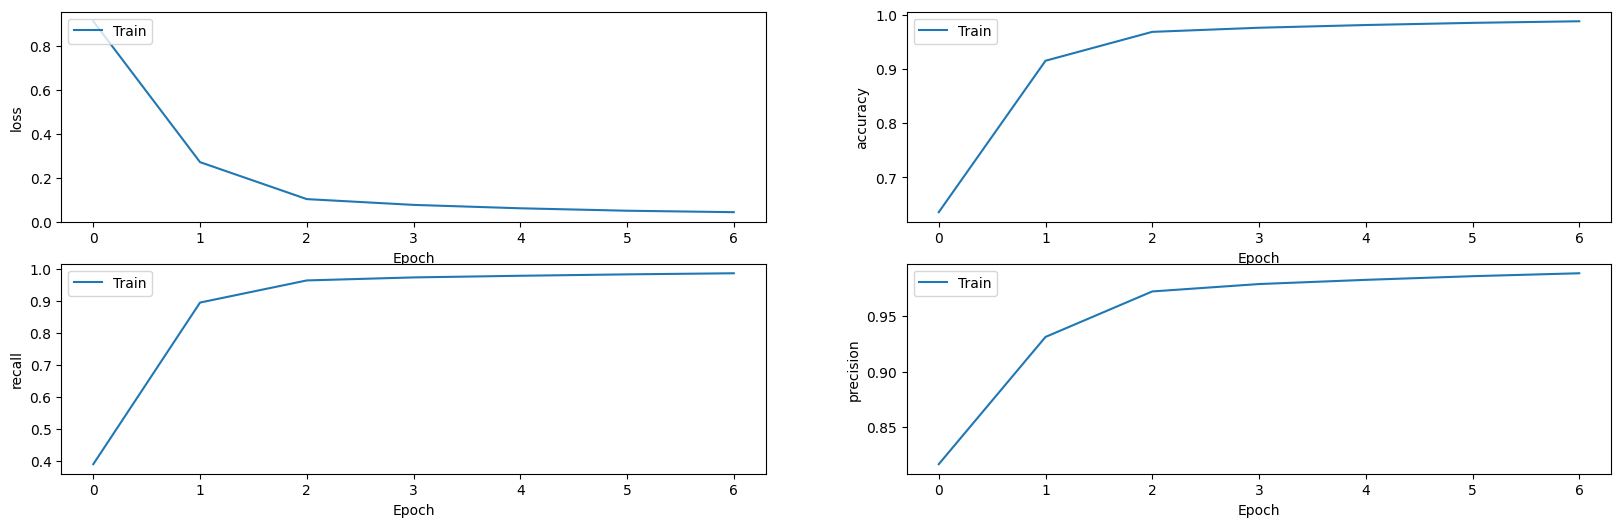

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
L = ["loss","accuracy","recall","precision"]
for i,V in enumerate(L):
  axs[i//2][i%2].plot(hist.history[V])
  axs[i//2][i%2].set_ylabel(V)
  axs[i//2][i%2].set_xlabel('Epoch')
  axs[i//2][i%2].legend(['Train', 'Validation'], loc='upper left')

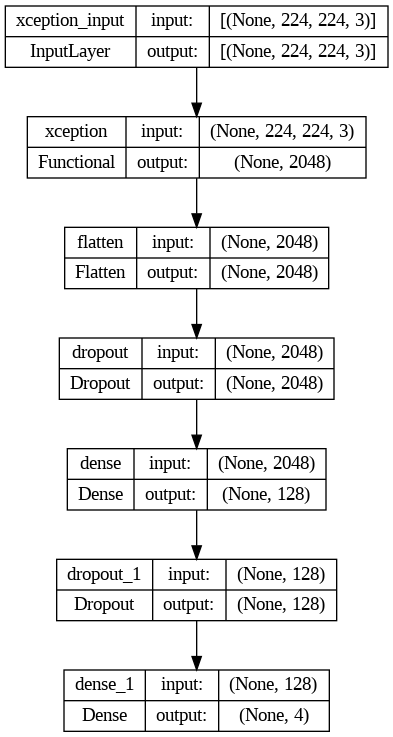

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
plot_model(base_model, show_shapes=True)

In [ ]:
model.evaluate(test_gen)

136/136 [==============================] - 15s 81ms/step - loss: 0.2484 - accuracy: 0.9391 - precision: 0.9407 - recall: 0.9359


[0.2484438270330429,
 0.9391143918037415,
 0.9406583309173584,
 0.9358856081962585]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
Preds = model.predict(test_gen)
Xception_Pred = np.argmax(Preds, axis=1)

In [ ]:
print(f"accuracy_score = {accuracy_score(Xception_Pred,test_gen.classes)}")
classification_report(test_gen.classes,Xception_Pred)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_gen.classes,Xception_Pred), annot=True, fmt='d', cmap='Blues')